In [14]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
# from matplotlib import cmsweep
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt

In [15]:
data_RO_seawater = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_RO_sea.csv')
data_RO_nacl = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_RO_nacl.csv')
data_RO_simple = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_RO_simple.csv')
data_RO_reaktoro = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_RO_reaktoro.csv')

In [16]:
data_MVC_seawater = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_sea.csv')
data_MVC_nacl = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_nacl.csv')
data_MVC_simple = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_simple.csv')
data_MVC_reaktoro = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_reaktoro.csv')

In [17]:
# find errors and create dataframe
results_col = ["LCOW","SEC", "Membrane Area" , "Operating Pressure"] 
error_sea = pd.DataFrame()
error_nacl = pd.DataFrame()
error_simple = pd.DataFrame()

for i in results_col:
    error_sea[i] = pd.DataFrame(abs(data_RO_reaktoro[i] - data_RO_seawater[i]) / data_RO_reaktoro[i]) * 100
    error_nacl[i] = pd.DataFrame(abs(data_RO_reaktoro[i] - data_RO_nacl[i]) / data_RO_reaktoro[i]) * 100
    error_simple[i] = pd.DataFrame(abs(data_RO_reaktoro[i] - data_RO_simple[i]) / data_RO_reaktoro[i]) * 100

In [18]:
# Sea errors
for i in results_col:
    print(i)
    print(np.mean(error_sea[i]))

LCOW
0.13456602725622283
SEC
0.13468496515448572
Membrane Area
0.17095051804399686
Operating Pressure
0.04237329677151634


In [19]:
# NaCl errors
for i in results_col:
    print(i)
    print(np.mean(error_nacl[i]))

LCOW
6.114595346079309
SEC
7.133074598354335
Membrane Area
0.1095537137072952
Operating Pressure
6.995218460460391


In [20]:
print(error_nacl)

        LCOW       SEC  Membrane Area  Operating Pressure
0   6.176976  7.157591       0.236458            7.001899
1   6.169200  7.152210       0.228215            6.997536
2   6.161845  7.147234       0.219872            6.993597
3   6.154908  7.142660       0.211443            6.990016
4   6.148394  7.138453       0.202887            6.986815
5   6.142287  7.134630       0.194234            6.983953
6   6.136564  7.131181       0.185483            6.981450
7   6.131236  7.128090       0.176621            6.979308
8   6.126270  7.125329       0.167638            6.977462
9   6.121690  7.122911       0.158572            6.975975
10  6.117480  7.120840       0.149399            6.974805
11  6.113615  7.119051       0.140092            6.973952
12  6.110094  7.117622       0.130693            6.973393
13  6.106927  7.116479       0.121201            6.973128
14  6.104091  7.115626       0.111579            6.973153
15  6.101586  7.115086       0.101879            6.973448
16  6.099411  

In [21]:
sea_color = "#C73E1D"
nacl_color = "#4A7B9D"
simple_color = "#467740"
reaktoro_color = "#FFD046"

title_size = 14
plt.rcParams["font.family"] = "Arial"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['font.size'] = 14

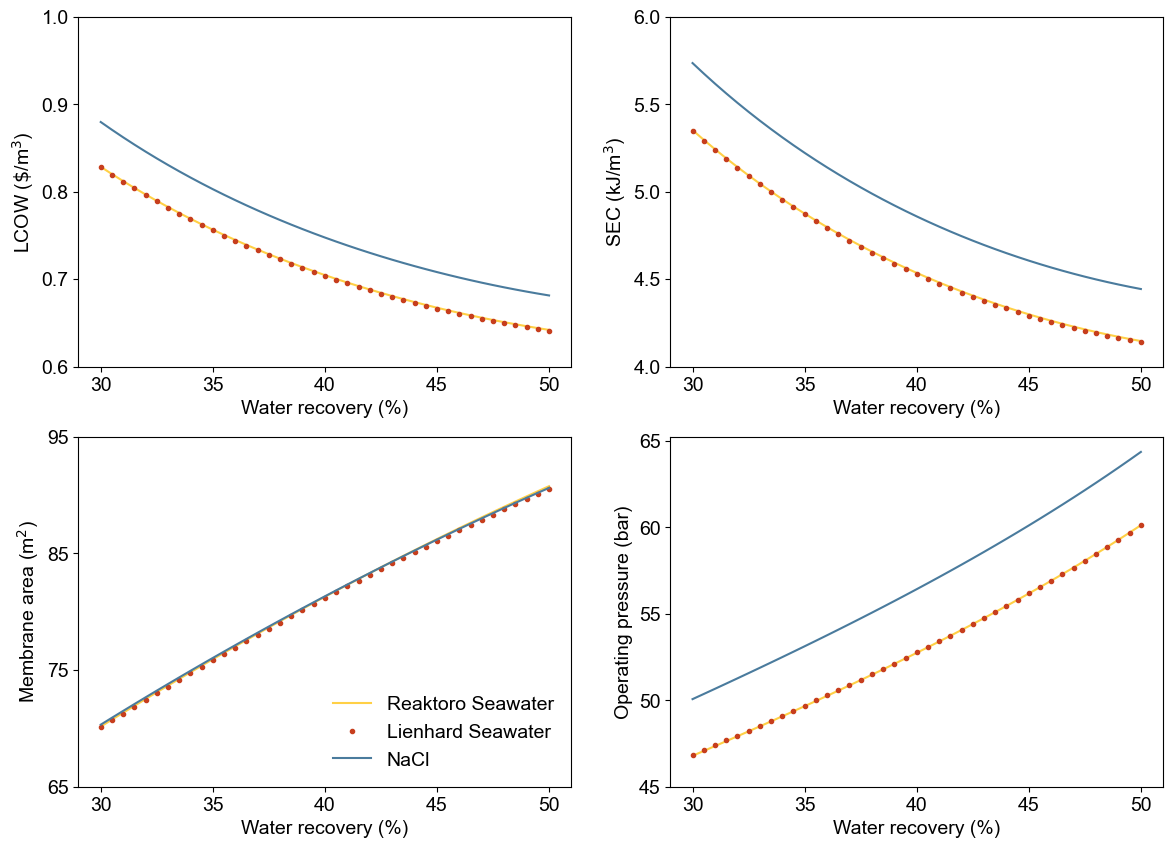

In [22]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(3.5*4, 2.5*4)) #figsize=(3.5, 2.5)

axs[0,0].plot(data_RO_reaktoro['# Water Recovery']*100, data_RO_reaktoro['LCOW'],  color=reaktoro_color)
axs[0,0].plot(data_RO_seawater['# Water Recovery']*100, data_RO_seawater['LCOW'], ".", color=sea_color)
axs[0,0].plot(data_RO_nacl['# Water Recovery']*100, data_RO_nacl['LCOW'], color=nacl_color)
# axs[0,0].plot(data_RO_simple['# Water Recovery']*100, data_RO_simple['LCOW'], color=simple_color)
axs[0,0].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[0,0].set_ylabel("LCOW ($\$$/m$^3$)", fontsize=title_size)
axs[0,0].set_yticks([0.6, 0.7, 0.8, 0.9, 1])

axs[0,1].plot(data_RO_reaktoro['# Water Recovery']*100, data_RO_reaktoro['SEC'],  color=reaktoro_color)
axs[0,1].plot(data_RO_seawater['# Water Recovery']*100, data_RO_seawater['SEC'], ".", color=sea_color)
axs[0,1].plot(data_RO_nacl['# Water Recovery']*100, data_RO_nacl['SEC'], color=nacl_color)
# axs[0,1].plot(data_RO_simple['# Water Recovery']*100, data_RO_simple['SEC'], color=simple_color)
axs[0,1].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[0,1].set_ylabel("SEC (kJ/m$^{3}$)", fontsize=title_size)
axs[0,1].set_yticks([4,4.5,5,5.5,6])

axs[1,0].plot(data_RO_reaktoro['# Water Recovery']*100, data_RO_reaktoro['Membrane Area'],  color=reaktoro_color)
axs[1,0].plot(data_RO_seawater['# Water Recovery']*100, data_RO_seawater['Membrane Area'],".", color=sea_color)
axs[1,0].plot(data_RO_nacl['# Water Recovery']*100, data_RO_nacl['Membrane Area'], color=nacl_color)
# axs[1,0].plot(data_RO_simple['# Water Recovery']*100, data_RO_simple['Membrane Area'], color=simple_color)

axs[1,0].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[1,0].set_ylabel("Membrane area (m$^{2}$)", fontsize=title_size)
axs[1,0].set_yticks([65, 75, 85, 95])

axs[1,1].plot(data_RO_reaktoro['# Water Recovery']*100, data_RO_reaktoro['Operating Pressure']/1e5,  color=reaktoro_color)
axs[1,1].plot(data_RO_seawater['# Water Recovery']*100, data_RO_seawater['Operating Pressure']/1e5, ".", color=sea_color)
axs[1,1].plot(data_RO_nacl['# Water Recovery']*100, data_RO_nacl['Operating Pressure']/1e5, color=nacl_color)
# axs[1,1].plot(data_RO_simple['# Water Recovery']*100, data_RO_simple['Operating Pressure']/1e5, color=simple_color)


axs[1,1].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[1,1].set_ylabel("Operating pressure (bar)", fontsize=title_size)
axs[1,1].set_yticks([45, 50, 55, 60, 65])

axs[1,0].legend(["Reaktoro Seawater", "Lienhard Seawater", "NaCl"], loc="lower right", fontsize=title_size,frameon=False)

fig.savefig("RO_comparison")


In [23]:
results_col = ["LCOW","SEC", "Evaporator area" , "Compressor pressure ratio"] 
error_sea_MVC = pd.DataFrame()
error_nacl_MVC = pd.DataFrame()
error_simple_MVC = pd.DataFrame()

for i in results_col:
    error_sea_MVC[i] = pd.DataFrame((data_MVC_reaktoro[i] - data_MVC_seawater[i]) / data_MVC_reaktoro[i]) * 100
    error_nacl_MVC[i] = pd.DataFrame((data_MVC_reaktoro[i] - data_MVC_nacl[i]) / data_MVC_reaktoro[i]) * 100
    error_simple_MVC[i] = pd.DataFrame((data_MVC_reaktoro[i] - data_MVC_simple[i]) / data_MVC_reaktoro[i]) * 100

In [24]:
print(error_sea_MVC)

        LCOW       SEC  Evaporator area  Compressor pressure ratio
0   0.106834 -0.124745         0.610043                  -0.057333
1   0.057925 -0.195397         0.570240                  -0.088822
2   0.001693 -0.284156         0.533262                  -0.128189
3  -0.063301 -0.393792         0.499887                  -0.176838
4  -0.138627 -0.527496         0.470868                  -0.236163
5  -0.226131 -0.688952         0.447060                  -0.307990
6  -0.328207 -0.882741         0.429476                  -0.394507
7  -0.447620 -1.114734         0.419423                  -0.498770
8  -0.587936 -1.392160         0.418596                  -0.624360
9  -0.753632 -1.724175         0.429331                  -0.776009
10 -0.950363 -2.122555         0.454835                  -0.960130
11 -1.185582 -2.602636         0.499564                  -1.184884
12 -1.468933 -3.184115         0.569870                  -1.461547
13 -1.813217 -3.893386         0.674576                  -1.80

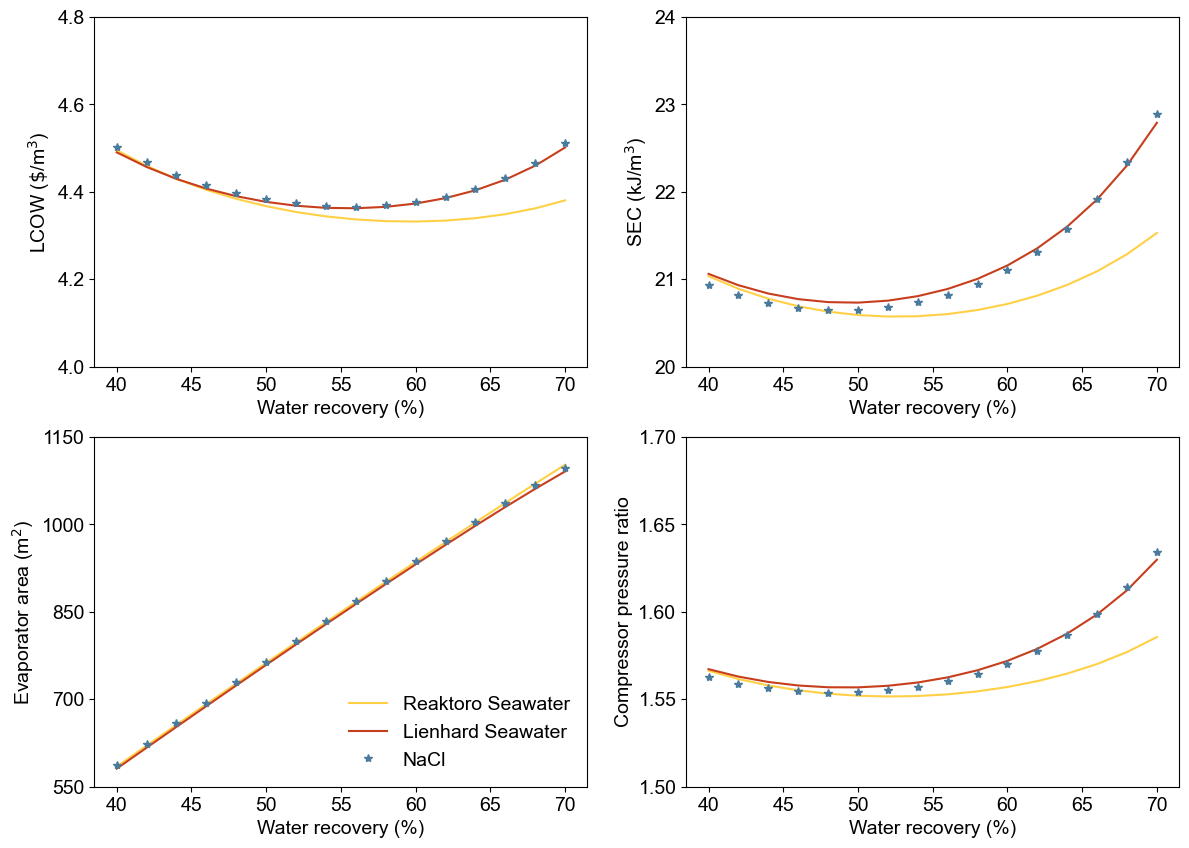

In [25]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(3.5*4, 2.5*4))

axs[0,0].plot(data_MVC_reaktoro['# Water Recovery']*100, data_MVC_reaktoro['LCOW'], color=reaktoro_color)
axs[0,0].plot(data_MVC_seawater['# Water Recovery']*100, data_MVC_seawater['LCOW'], color=sea_color)
axs[0,0].plot(data_MVC_nacl['# Water Recovery']*100, data_MVC_nacl['LCOW'], "*", color=nacl_color)

# axs[0,0].plot(data_MVC_simple['# Water Recovery']*100, data_MVC_simple['LCOW'], color=simple_color)

axs[0,0].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[0,0].set_ylabel("LCOW ($\$$/m$^3$)", fontsize=title_size)
axs[0,0].set_yticks([4, 4.2, 4.4, 4.6, 4.8])

axs[0,1].plot(data_MVC_reaktoro['# Water Recovery']*100, data_MVC_reaktoro['SEC'], color=reaktoro_color)
axs[0,1].plot(data_MVC_seawater['# Water Recovery']*100, data_MVC_seawater['SEC'], color=sea_color)
axs[0,1].plot(data_MVC_nacl['# Water Recovery']*100, data_MVC_nacl['SEC'], "*", color=nacl_color)

# axs[0,1].plot(data_MVC_simple['# Water Recovery']*100, data_MVC_simple['SEC'], color=simple_color)

axs[0,1].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[0,1].set_ylabel("SEC (kJ/m$^{3}$)", fontsize=title_size)
axs[0,1].set_yticks([20,21,22,23,24])

axs[1,0].plot(data_MVC_reaktoro['# Water Recovery']*100, data_MVC_reaktoro['Evaporator area'], color=reaktoro_color)
axs[1,0].plot(data_MVC_seawater['# Water Recovery']*100, data_MVC_seawater['Evaporator area'], color=sea_color)
axs[1,0].plot(data_MVC_nacl['# Water Recovery']*100, data_MVC_nacl['Evaporator area'], "*", color=nacl_color)

# axs[1,0].plot(data_MVC_simple['# Water Recovery']*100, data_MVC_simple['Evaporator area'], color=simple_color)

axs[1,0].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[1,0].set_ylabel("Evaporator area (m$^{2}$)", fontsize=title_size)
axs[1,0].set_yticks([550,700,850,1000,1150])

axs[1,1].plot(data_MVC_reaktoro['# Water Recovery']*100, data_MVC_reaktoro['Compressor pressure ratio'], color=reaktoro_color)
axs[1,1].plot(data_MVC_seawater['# Water Recovery']*100, data_MVC_seawater['Compressor pressure ratio'], color=sea_color)
axs[1,1].plot(data_MVC_nacl['# Water Recovery']*100, data_MVC_nacl['Compressor pressure ratio'], "*", color=nacl_color)

# axs[1,1].plot(data_MVC_simple['# Water Recovery']*100, data_MVC_simple['Compressor pressure ratio'], color=simple_color)

axs[1,1].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[1,1].set_ylabel("Compressor pressure ratio", fontsize=title_size)
axs[1,1].set_yticks([1.5,1.55,1.6,1.65,1.7])

axs[1,0].legend(["Reaktoro Seawater", "Lienhard Seawater", "NaCl"],loc="lower right",fontsize=title_size, frameon=False)

fig.savefig("MVC_comparison")

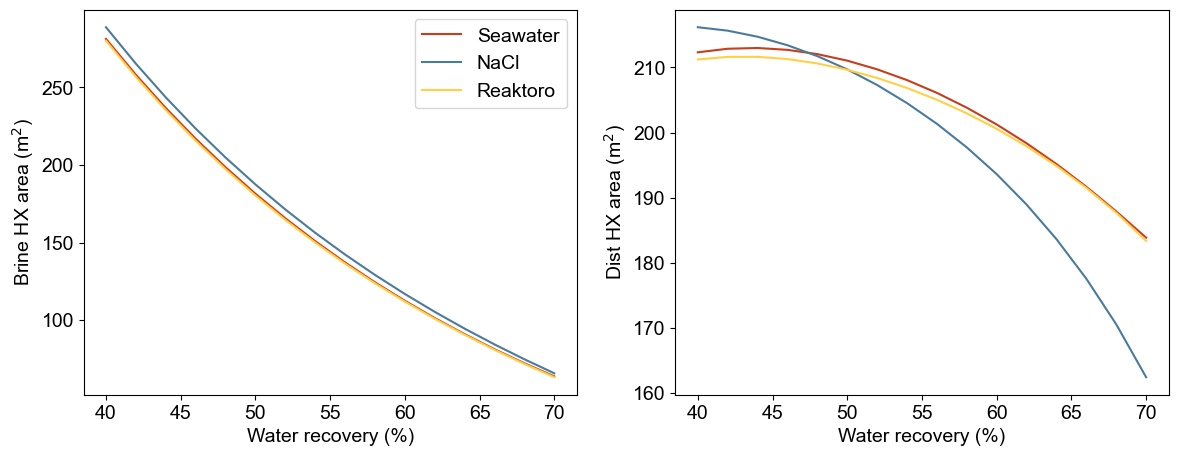

In [26]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(3.5*4, 2.5*2))

axs[0].plot(data_MVC_seawater['# Water Recovery']*100, data_MVC_seawater['Brine HX area'], color=sea_color)
axs[0].plot(data_MVC_nacl['# Water Recovery']*100, data_MVC_nacl['Brine HX area'], color=nacl_color)
axs[0].plot(data_MVC_reaktoro['# Water Recovery']*100, data_MVC_reaktoro['Brine HX area'], color=reaktoro_color)
# axs[0].plot(data_MVC_simple['# Water Recovery']*100, data_MVC_simple['Brine HX area'], color=simple_color)

axs[0].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[0].set_ylabel("Brine HX area (m$^{2}$)", fontsize=title_size)


axs[1].plot(data_MVC_seawater['# Water Recovery']*100, data_MVC_seawater['Dist HX area'], color=sea_color)
axs[1].plot(data_MVC_nacl['# Water Recovery']*100, data_MVC_nacl['Dist HX area'], color=nacl_color)
axs[1].plot(data_MVC_reaktoro['# Water Recovery']*100, data_MVC_reaktoro['Dist HX area'], color=reaktoro_color)
# axs[1].plot(data_MVC_simple['# Water Recovery']*100, data_MVC_simple['Dist HX area'], color=simple_color)

axs[1].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[1].set_ylabel("Dist HX area (m$^{2}$)", fontsize=title_size)

axs[0].legend(["Seawater","NaCl","Reaktoro"],loc="upper right",fontsize=title_size)

fig.savefig("MVC_comparison_HX")